In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import missingno as msno 
import seaborn as sns
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus" : False })

In [23]:
df=pd.read_csv('./data/korean-idol.csv')

In [7]:
df[df['그룹'].isnull()]

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745


In [8]:
df.isnull().sum()

이름         0
그룹         1
소속사        0
성별         0
생년월일       0
키          2
혈액형        0
브랜드평판지수    0
dtype: int64

(0.0, 2.0)

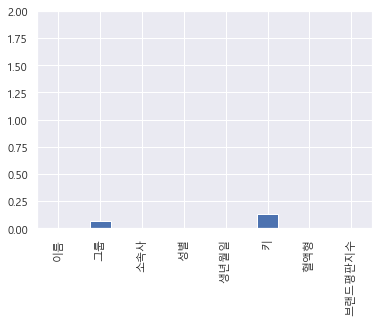

In [9]:
(df.isnull().sum()/len(df)).plot(kind='bar')
plt.ylim(0,2)

In [10]:
#데이터 프레임 전체의 null갯수 확인      =>  if.isnull().sum()

#null인 데이터만 필터링(isnull())        =>df[df['특정열'].isnull()]]

#null이 아닌 데이터만 필터링(notnull())       =>df[df['특정열'].notull()]


<AxesSubplot:>

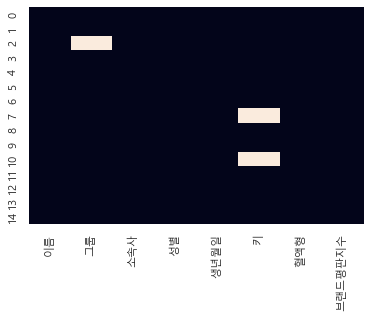

In [11]:
sns.heatmap(df.isnull(),cbar=False)

In [25]:
df0=df.set_index('이름')

<AxesSubplot:ylabel='이름'>

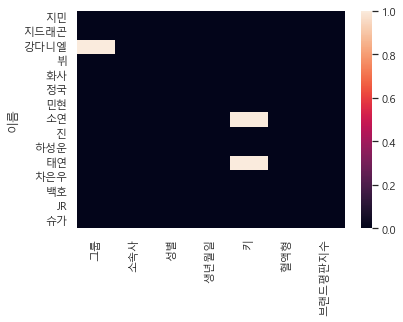

In [26]:
sns.heatmap(df0.isnull())

<AxesSubplot:>

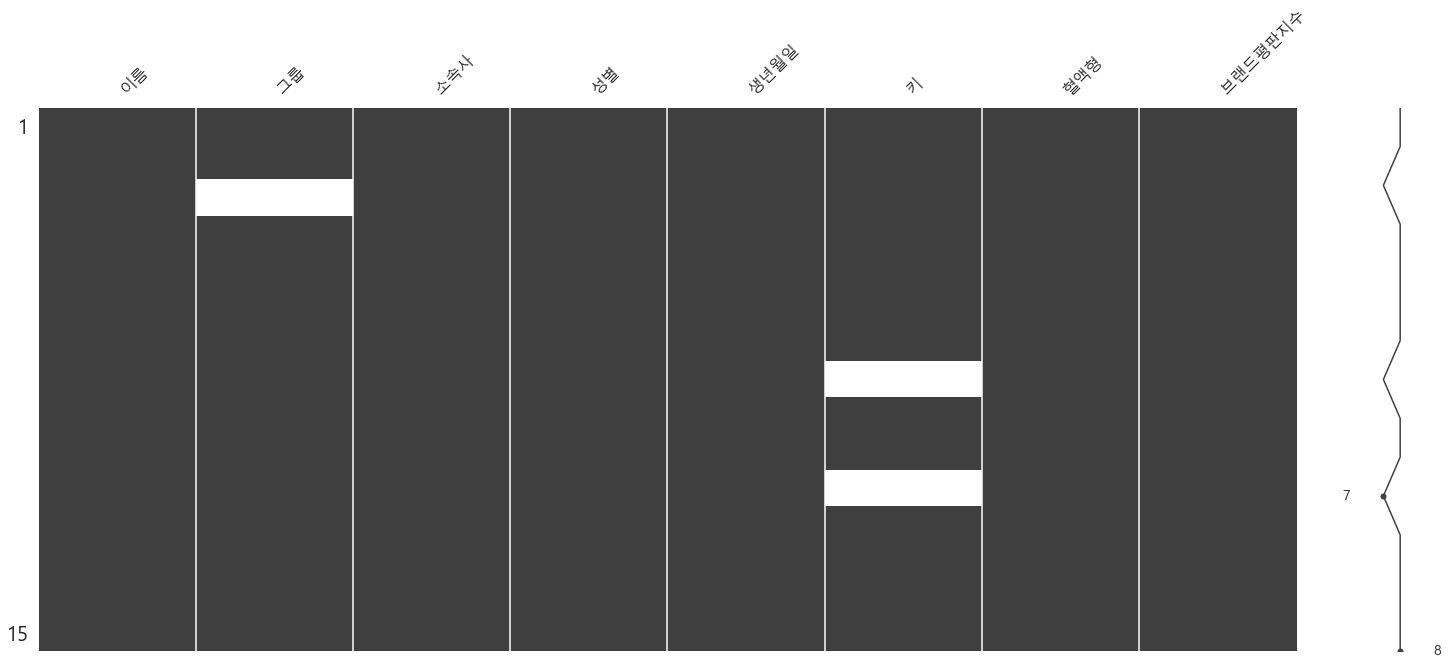

In [31]:
msno.matrix(df)

<AxesSubplot:>

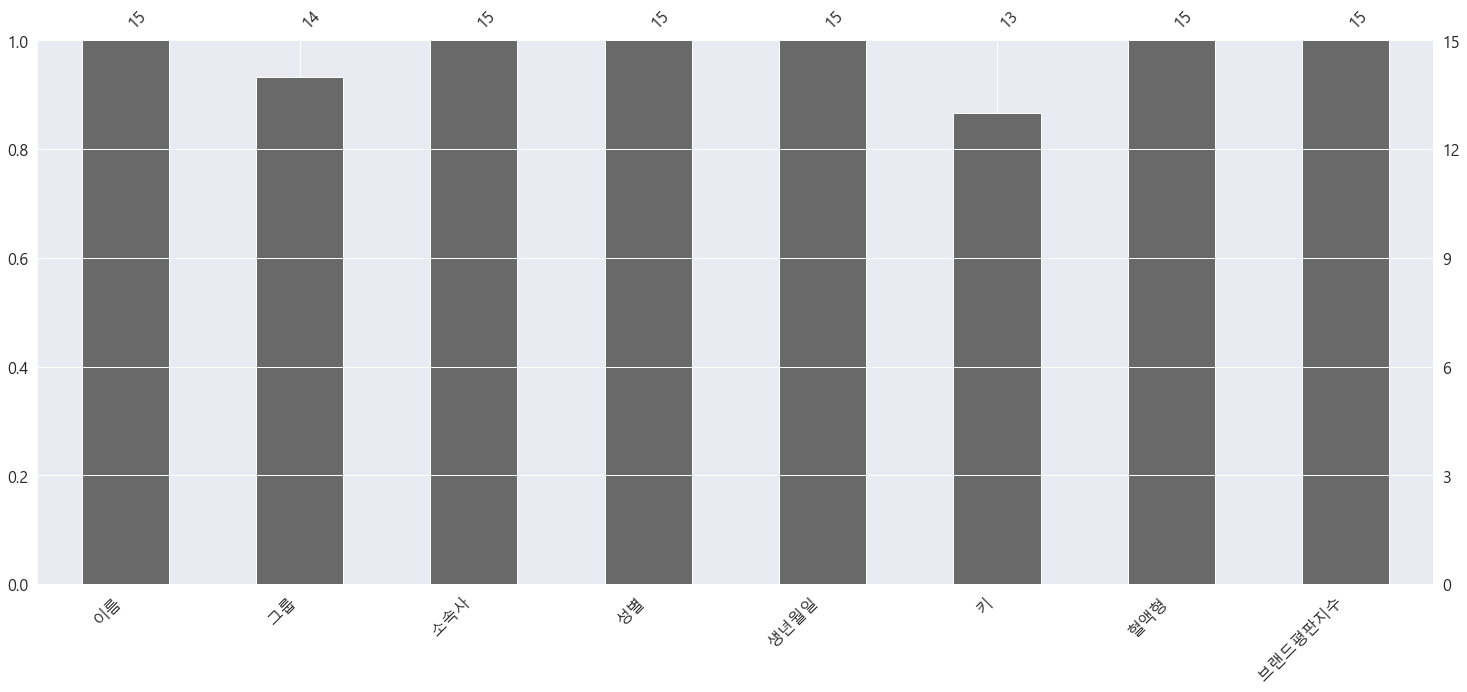

In [34]:
msno.bar(df)

<AxesSubplot:>

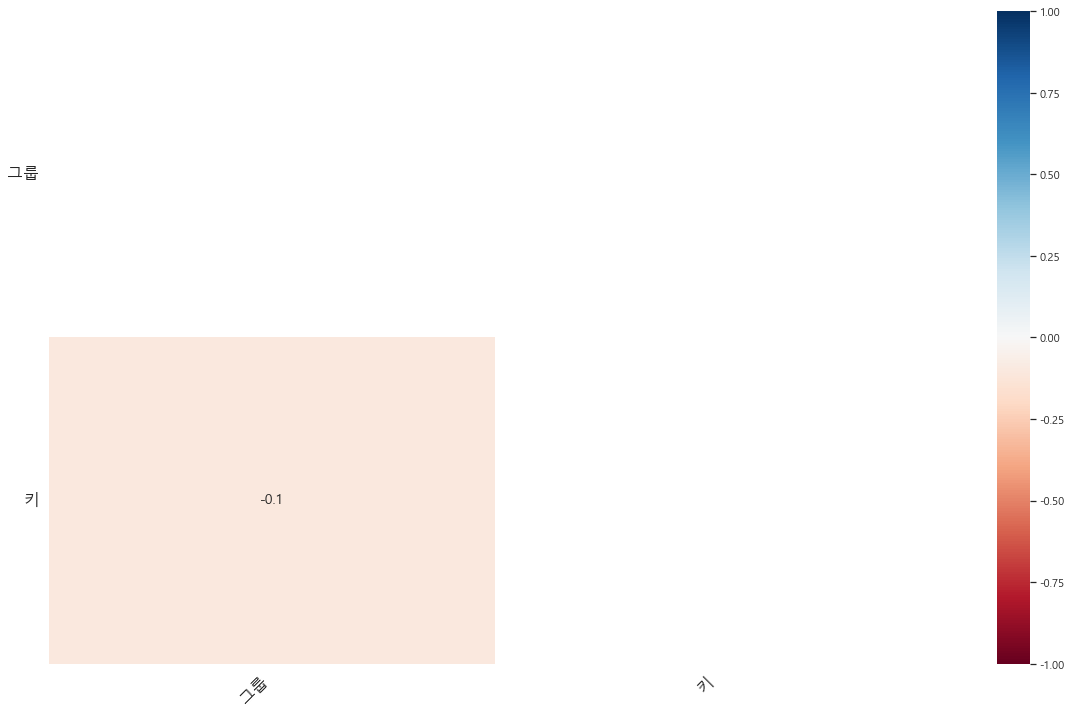

In [35]:
msno.heatmap(df)

In [36]:
df.dtypes

이름          object
그룹          object
소속사         object
성별          object
생년월일        object
키          float64
혈액형         object
브랜드평판지수      int64
dtype: object

In [39]:
df[df.isnull().any(axis=1)]

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
7,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615
10,태연,소녀시대,SM,여자,1989-03-09,NaN,A,3918661


In [41]:
df.dropna()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489
11,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027
12,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654


In [54]:
df[df.isnull().any]

이름         False
그룹          True
소속사        False
성별         False
생년월일       False
키           True
혈액형        False
브랜드평판지수    False
dtype: bool

In [58]:
res=[]
s=['빅뱅','뉴이스트']
for i in df['그룹']:
    try :
        if i in s:
            res.append(None)
        else:
            res.append(i)
    except:
            res.append(None)
res

['방탄소년단',
 None,
 nan,
 '방탄소년단',
 '마마무',
 '방탄소년단',
 None,
 '아이들',
 '방탄소년단',
 '핫샷',
 '소녀시대',
 '아스트로',
 None,
 None,
 '방탄소년단']

In [59]:
df['삭제여부']=res

In [61]:
df.dropna()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,삭제여부
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260,방탄소년단
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501,방탄소년단
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928,마마무
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335,방탄소년단
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308,방탄소년단
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489,핫샷
11,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027,아스트로
14,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,2925442,방탄소년단


In [64]:
df[df['그룹']=='방탄소년단']

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,삭제여부
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260,방탄소년단
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501,방탄소년단
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335,방탄소년단
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308,방탄소년단
14,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,2925442,방탄소년단


In [66]:
cond1=df['그룹']=='방탄소년단'
cond2=df['그룹']=='마마무'
cond3=df['그룹']=='뉴이스트'
df[cond1 | cond2 | cond3]

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,삭제여부
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260,방탄소년단
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501,방탄소년단
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928,마마무
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335,방탄소년단
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792,None
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308,방탄소년단
12,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654,None
13,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137,None
14,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,2925442,방탄소년단


In [68]:
df[df['그룹'].isin(['방탄소년단','뉴이스트','마마무'])]

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,삭제여부
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260,방탄소년단
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501,방탄소년단
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928,마마무
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335,방탄소년단
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792,None
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308,방탄소년단
12,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654,None
13,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137,None
14,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,2925442,방탄소년단


In [74]:
tall=df['키']>=180
short=df['키']<170
df[tall|short]

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,삭제여부
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745,NaN
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928,마마무
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792,None
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489,핫샷
11,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027,아스트로


In [75]:
df0[(df0['키'] >= 180) | (df0['키'] <= 170)]

,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
이름,,,,,,,
강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489
차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027


In [77]:
df.fillna(0)

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,삭제여부
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260,방탄소년단
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947,0
2,강다니엘,0,커넥트,남자,1996-12-10,180.0,A,8273745,0
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501,방탄소년단
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928,마마무
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335,방탄소년단
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792,0
7,소연,아이들,큐브,여자,1998-08-26,0.0,B,4668615,아이들
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308,방탄소년단
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489,핫샷


In [78]:
df.fillna(df.mean())

C:\Users\yumei\AppData\Local\Temp\ipykernel_13752\634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,삭제여부
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.600000,A,10523260,방탄소년단
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.000000,A,9916947,None
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.000000,A,8273745,NaN
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.000000,AB,8073501,방탄소년단
4,화사,마마무,RBW,여자,1995-07-23,162.100000,A,7650928,마마무
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.000000,A,5208335,방탄소년단
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.300000,O,4989792,None
7,소연,아이들,큐브,여자,1998-08-26,175.792308,B,4668615,아이들
8,진,방탄소년단,빅히트,남자,1992-12-04,179.200000,O,4570308,방탄소년단
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.100000,A,4036489,핫샷


In [79]:
df.fillna(method='ffill')

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,삭제여부
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260,방탄소년단
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947,방탄소년단
2,강다니엘,빅뱅,커넥트,남자,1996-12-10,180.0,A,8273745,방탄소년단
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501,방탄소년단
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928,마마무
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335,방탄소년단
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792,방탄소년단
7,소연,아이들,큐브,여자,1998-08-26,182.3,B,4668615,아이들
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308,방탄소년단
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489,핫샷


In [80]:
df.fillna(df.mean())

C:\Users\yumei\AppData\Local\Temp\ipykernel_13752\634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,삭제여부
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.600000,A,10523260,방탄소년단
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.000000,A,9916947,None
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.000000,A,8273745,NaN
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.000000,AB,8073501,방탄소년단
4,화사,마마무,RBW,여자,1995-07-23,162.100000,A,7650928,마마무
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.000000,A,5208335,방탄소년단
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.300000,O,4989792,None
7,소연,아이들,큐브,여자,1998-08-26,175.792308,B,4668615,아이들
8,진,방탄소년단,빅히트,남자,1992-12-04,179.200000,O,4570308,방탄소년단
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.100000,A,4036489,핫샷


In [103]:
df.describe()

SyntaxError: invalid syntax (2530281078.py, line 1)

In [99]:
df1.copy()

,키,브랜드평판지수
count,13.000000,1.500000e+01
mean,175.792308,5.655856e+06
std,5.820576,2.539068e+06
min,162.100000,2.925442e+06
25%,174.000000,3.712344e+06
50%,177.000000,4.668615e+06
75%,179.200000,7.862214e+06
max,183.000000,1.052326e+07


In [101]:
#method=backfill', 'bfill', 'pad', 'ffill', None
df.fillna(method='bfill')

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,방탄소년단,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
7,소연,아이들,큐브,여자,1998-08-26,179.2,B,4668615
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489


In [126]:
max_freq=df['그룹'].value_counts().index[0]

In [128]:
df['그룹']=df['그룹'].fillna(max_freq)
df

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,None,None,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,방탄소년단,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
7,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489


In [149]:
temp=df[0:1]

In [150]:
temp.loc[0,['그룹','소속사','성별']]=None    #value값을 none으로 변하기

In [151]:
temp

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,None,None,None,1995-10-13,173.6,A,10523260


In [120]:
df0=pd.concat([df,temp])

In [121]:
df0

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,None,None,None,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
7,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489


In [144]:
a = ['그룹', '소속사', '성별']
for i in a:
    group=df1[i].value_counts().index[0]
    df1[i]=df1[i].fillna(max_freq)
df1


,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,방탄소년단,방탄소년단,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,방탄소년단,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
7,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489


In [12]:
df1=df.copy()

In [13]:
df1

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
7,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489


In [14]:
name=['그룹','소속사','성별']
for i in name:
    freq=df1[i].value_counts().index[0]
    df1[i]=df1[i].fillna(freq)

In [15]:
df

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
7,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489


In [17]:
res=[]
# null이 있는 컬럼 필터링
name=df1.columns
name_null=name[df1.isnull().any()]

#null이 있는 컬럼중 'object'만 필터링
for i in name_null:
    if df1[i].dtypes=='object':
        res.append(i)

# 'object'형의 컬럼의 null에 최빈값 넣기
for i in res:
    freq=df1[i].value_counts().index[0]
    df1[i]=df1[i].fillna(freq)


[]

In [60]:
df1

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
7,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489


In [20]:
df1['그룹'].dtypes=='float64'

False

In [32]:
df1.dtypes

이름          object
그룹          object
소속사         object
성별          object
생년월일        object
키          float64
혈액형         object
브랜드평판지수      int64
dtype: object

In [36]:
df1['키'].dtypes=='float64'

True

In [54]:
res=[]
name=df1.columns

for i in name:
    if df1[i].dtypes != 'object':
        res.append(i)
res

['키', '브랜드평판지수']

In [64]:
res=[]
fm=['float64','int64']
for i in df1:
    if df1[i].dtypes in fm:
        res.append(i)
print(res)
df1[res]

['키', '브랜드평판지수']


,키,브랜드평판지수
0,173.6,10523260
1,177.0,9916947
2,180.0,8273745
3,178.0,8073501
4,162.1,7650928
5,178.0,5208335
6,182.3,4989792
7,NaN,4668615
8,179.2,4570308
9,167.1,4036489


In [63]:
res=[]
fm=['float64','int64']
for i in df1:
    if df1[i].dtypes in fm:
        res.append(i)
print(res)
df1[res]


['키', '브랜드평판지수']


,키,브랜드평판지수
0,173.6,10523260
1,177.0,9916947
2,180.0,8273745
3,178.0,8073501
4,162.1,7650928
5,178.0,5208335
6,182.3,4989792
7,NaN,4668615
8,179.2,4570308
9,167.1,4036489


In [ ]:
result = df.isin(match_df)

In [65]:
df1.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [82]:
df1.dtypes.isin(['float64','int64'])
df1.dtypes

이름          object
그룹          object
소속사         object
성별          object
생년월일        object
키          float64
혈액형         object
브랜드평판지수      int64
dtype: object